# Survey Analysis
--------------
This notebook looks at the 2018 customer survey provided by Mark

### Set up

In [1]:
library(ggplot2)
suppressMessages(library(tidyverse))
library(readxl)

In [2]:
survey <- suppressMessages(read_excel("../../../data/survey_data.xlsx"))

## Data Cleaning
-----

In [3]:
# data cleaning
visualization <- survey %>%
    rename(drive_alone = "Drive alone:How do you typically travel in these areas on weekdays during tolling hours? (Choose all that apply)",
          income = "What is your total annual pre-tax household income?",
          gender = "What is your gender?",
          carpool = "Carpool with friends, family members or coworkers:How do you typically travel in these areas on weekdays during tolling hours? (Choose all that apply)",
          days_travel = "In a typical week, about how many weekdays do you usually travel on parts of I-405 with express toll lanes during tolling hours?",
          reliability = "Express toll lanes give people a reliable choice for a faster trip:How much do you agree or disagree with the following statements?",
          value_of_time = "The express toll lanes are a good value for the time they save:How much do you agree or disagree with the following statements?",
          penalty = "There should be higher penalties for people caught cheating to avoid paying tolls:How much do you agree or disagree with the following statements?",
          use = "About how often do you choose to use the express toll lanes during tolling hours? (Please consider both free and paid trips in the express toll lanes).",
          pay_toll = "When you use the express toll lanes during tolling hours, how often do you pay a toll?",
          historic_user = "How long have you been regularly travelling on I-405?",
          commuter = "Travel to and/or from work:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ three answers)",
          status = "Status")

# sets all "na's" as 0s since the survey gives binary results to choice question
visualization$drive_alone[is.na(visualization$drive_alone)] <- 0
visualization$drive_alone[visualization$drive_alone == "Drive alone"] <- 1

visualization$carpool[is.na(visualization$carpool)] <- 0
visualization$carpool[visualization$carpool == "Carpool with friends, family members or coworkers"] <- 1

#sets days traveled in a weekday and income to integers
visualization$days_travel[visualization$days_travel == "1 day"] <- 1
visualization$days_travel[visualization$days_travel == "2 days"] <- 2
visualization$days_travel[visualization$days_travel == "3 days"] <- 3
visualization$days_travel[visualization$days_travel == "4 days"] <- 4
visualization$days_travel[visualization$days_travel == "5 days"] <- 5

visualization$income[visualization$income == "Below $35,000"] <- 17500
visualization$income[visualization$income == "$35,000 to less than $50,000"] <- 42500
visualization$income[visualization$income == "$50,000 to less than $75,000"] <- 62500
visualization$income[visualization$income == "$75,000 to less than $100,000"] <- 87500
visualization$income[visualization$income == "$100,000 to less than $125,000"] <- 112500
visualization$income[visualization$income == "$125,000 to less than $150,000"] <- 137500
visualization$income[visualization$income == "$150,000 to less than $175,000"] <- 162500
visualization$income[visualization$income == "$175,000 to less than $200,000"] <- 182500
visualization$income[visualization$income == "$200,000 to less than $250,000"] <- 225000
visualization$income[visualization$income == "$250,000 and over"] <- 275000

visualization$income_factor <- factor(visualization$income, levels = c(17500,
                                                                      42500,
                                                                      62500,
                                                                      87500,
                                                                      112500,
                                                                      137500,
                                                                      162500,
                                                                      182500,
                                                                      225000,
                                                                      275000), 
                                     labels = c("Below $35,000",
                                                                    "$35,000 to less than $50,000",
                                                                      "$50,000 to less than $75,000",
                                                                      "$75,000 to less than $100,000",
                                                                      "$100,000 to less than $125,000",
                                                                      "$125,000 to less than $150,000",
                                                                      "$150,000 to less than $175,000",
                                                                      "$175,000 to less than $200,000",
                                                                      "$200,000 to less than $250,000",
                                                                      "$250,000 and over"))
# factors and relevels categorical responses
visualization$penalty <- factor(visualization$penalty, levels = c("Strongly Agree",
                                                                         "Agree",
                                                                         "Neutral",
                                                                         "Disagree",
                                                                         "Strongly Disagree"))

visualization$reliability <- factor(visualization$reliability, levels = c("Strongly Agree",
                                                                         "Agree",
                                                                         "Neutral",
                                                                         "Disagree",
                                                                         "Strongly Disagree"))

visualization$value_of_time <- factor(visualization$value_of_time, levels = c("Strongly Agree",
                                                                         "Agree",
                                                                         "Neutral",
                                                                         "Disagree",
                                                                         "Strongly Disagree"))

visualization$use <- factor(visualization$use)

levels(visualization$use) <- c("always", "mostly", "never", "rarely", "equal")

visualization$use <- factor(visualization$use, levels = c("always",
                                                          "mostly",
                                                          "equal",
                                                          "rarely",
                                                          "never"))

visualization$pay_toll <- factor(visualization$pay_toll)

levels(visualization$pay_toll) <- c("always", "mostly", "rarely", "never", "equal")

visualization$pay_toll <- factor(visualization$pay_toll, levels = c("always",
                                                          "mostly",
                                                          "equal",
                                                          "rarely",
                                                          "never"))

visualization$historic_user <- factor(visualization$historic_user, levels = c("Less than 1 year",
                                                                                "1 - 3 years",
                                                                                "3 - 10 years",
                                                                                "More than 10 years"))

levels(visualization$historic_user) <- c("less_than_one", "one_to_three", "three_to_ten", "more_than_ten")

visualization$commuter[visualization$commuter == "Travel to and/or from work"] <- 1
visualization$commuter[is.na(visualization$commuter) ] <- 0


## Value of Time and Reliability Analysis
------
### People think the HOT lanes are more reliable than they are a good value of time. Income does not seem to affect this view.

Saving 7 x 7 in image


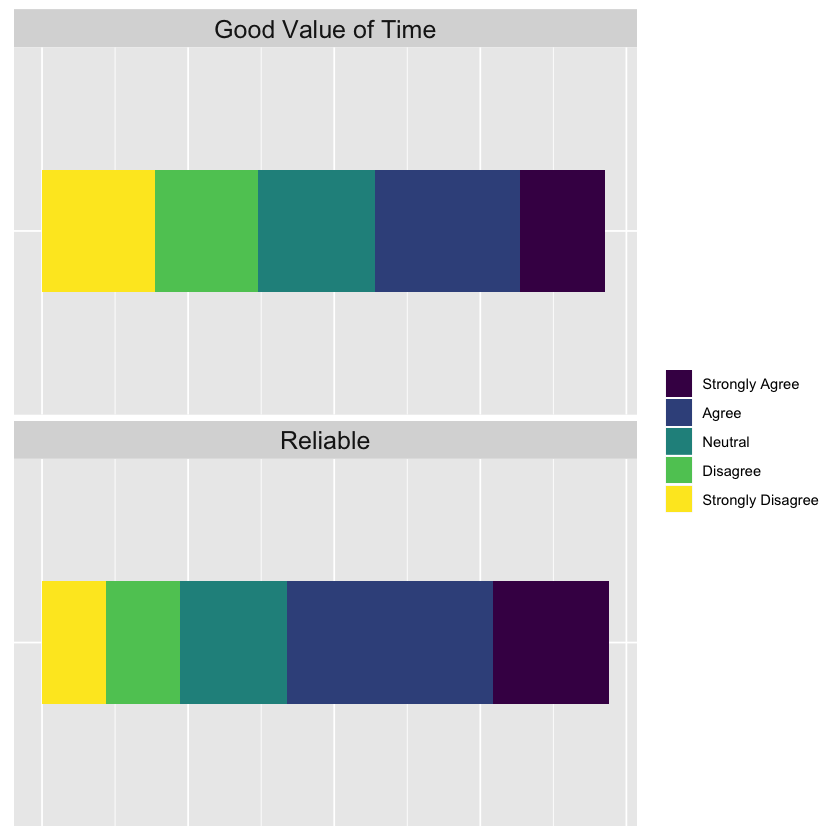

In [4]:
# makes pie chart of value of time
vot <- visualization %>%
    select(value_of_time, reliability) %>%
    gather(type, response)

vot$type[vot$type == "value_of_time"] <- "Good Value of Time"
vot$type[vot$type == "reliability"] <- "Reliable"

vot <- na.omit(vot)

vot$response <- factor(vot$response, levels = c("Strongly Agree",
                                                                         "Agree",
                                                                         "Neutral",
                                                                         "Disagree",
                                                                         "Strongly Disagree"))

votvorsurvey <- ggplot(vot, aes(x = factor(1), fill = response)) +
    geom_bar(width = .4) + 
    scale_fill_viridis_d() +
    #theme_void() +
    theme(axis.title=element_blank(),
      axis.text=element_blank(),
      axis.ticks=element_blank(),
         legend.title = element_blank(),
         strip.text = element_text(size = 15)) +
    coord_flip() +
  #  facet_grid(type ~ .) + 
     facet_wrap(type ~ ., ncol = 1) +
    theme(panel.spacing = unit(.25, "lines"))

votvorsurvey

ggsave(filename = "../../../images/figures.png", plot = votvorsurvey)

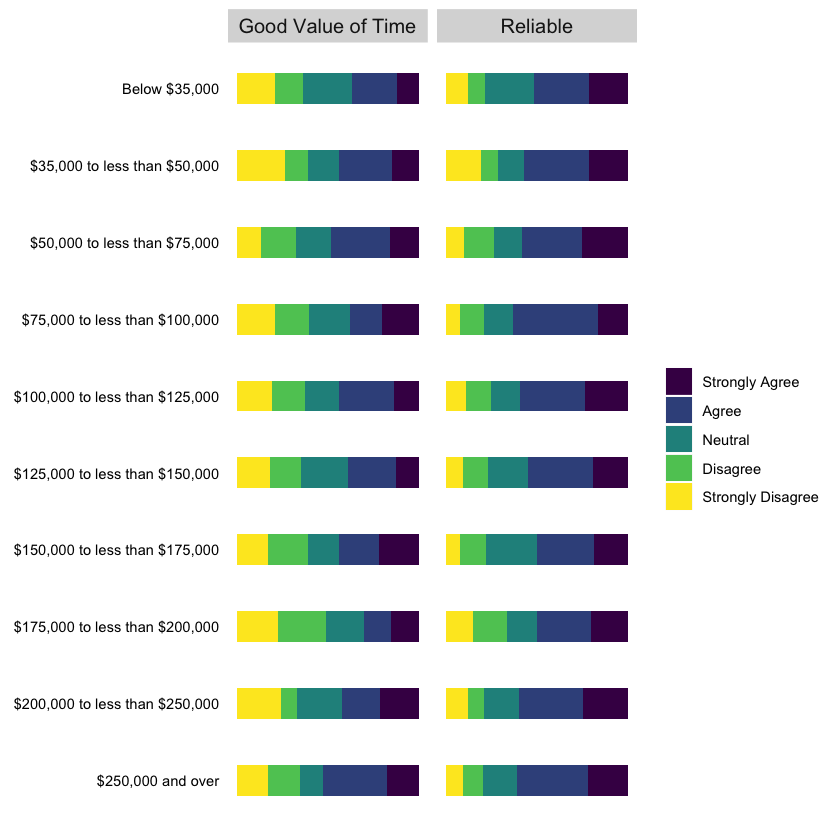

In [5]:
# makes pie chart of value of time
vot <- visualization %>%
    select(value_of_time, reliability, income_factor) %>%
    gather(type, response, -income_factor)

vot$type[vot$type == "value_of_time"] <- "Good Value of Time"
vot$type[vot$type == "reliability"] <- "Reliable"

vot <- na.omit(vot)

vot$response <- factor(vot$response, levels = c("Strongly Agree",
                                                                         "Agree",
                                                                         "Neutral",
                                                                         "Disagree",
                                                                         "Strongly Disagree"))

timereliabilityincome <- ggplot(vot) +
    geom_bar(aes(x = income_factor, fill = response), position = "fill", stat = "count", width = .4) + 
    scale_fill_viridis_d() +
    theme(axis.title=element_blank(),
          axis.ticks=element_blank(),
          legend.title = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_text(color = "black"),
         strip.text = element_text(size = 12),
         panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), panel.background = element_blank()) +
    coord_flip() +
    facet_grid(~type) +
    scale_y_continuous(labels = scales::percent_format()) +
    scale_x_discrete(limits = rev(levels(vot$income_factor)))

timereliabilityincome

ggsave(filename = "../../../images/timereliabilityincome.png", plot = timereliabilityincome, width = 12, height = 6)

Saving 7 x 7 in image


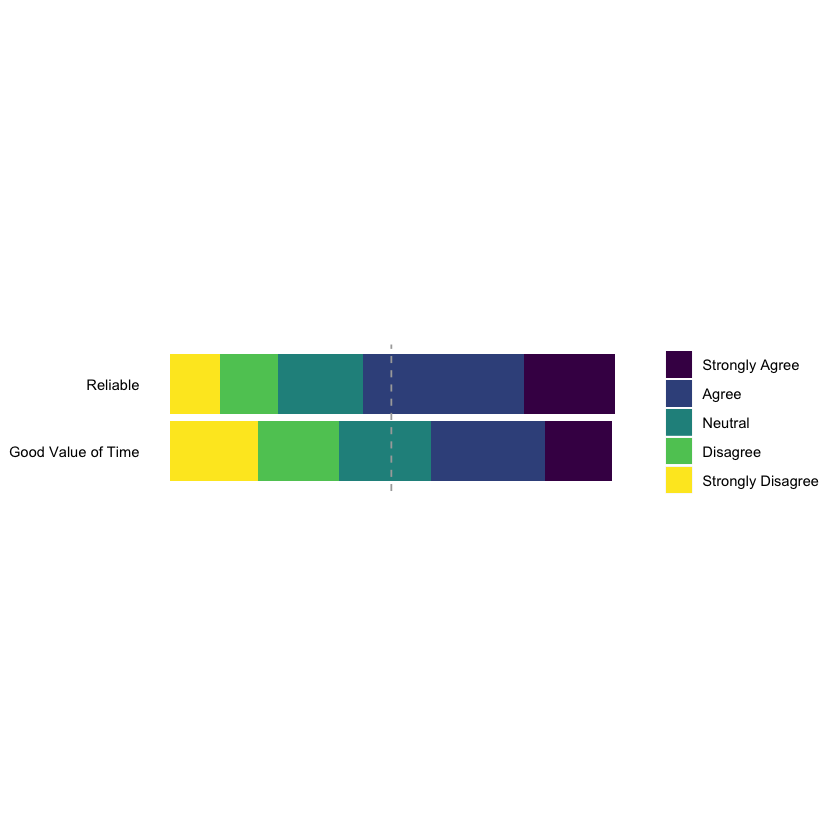

In [6]:
vot <- visualization %>%
    select(value_of_time, reliability) %>%
    gather(type, response)

vot$type[vot$type == "value_of_time"] <- "0"
vot$type[vot$type == "reliability"] <- "1"

vot <- na.omit(vot)

vot$response <- factor(vot$response, levels = c("Strongly Agree",
                                                                         "Agree",
                                                                         "Neutral",
                                                                         "Disagree",
                                                                         "Strongly Disagree"))

num <- nrow(vot) / 4
num <- as.integer(num)

votvorsurvey2 <- ggplot(vot, aes(x = type, fill = response)) +
    geom_bar() + 
    scale_fill_viridis_d() +
    theme(axis.title=element_blank(),
      axis.ticks=element_blank(),
         legend.title = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_text(color = "black"),
         strip.text = element_text(size = 15),
         panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), panel.background = element_blank()
         ) +
    coord_flip() +
    geom_text(color = "darkgrey", aes(label = "50% of Responses"), x = 0, y = 385) +
    geom_hline(yintercept = num, color = "darkgrey", linetype = "dashed") +
    theme(aspect.ratio= .3) +
    scale_x_discrete(labels = c("Good Value of Time", "Reliable"))

votvorsurvey2

ggsave(filename = "../../../images/votvorsurvey2.png", plot = votvorsurvey2)

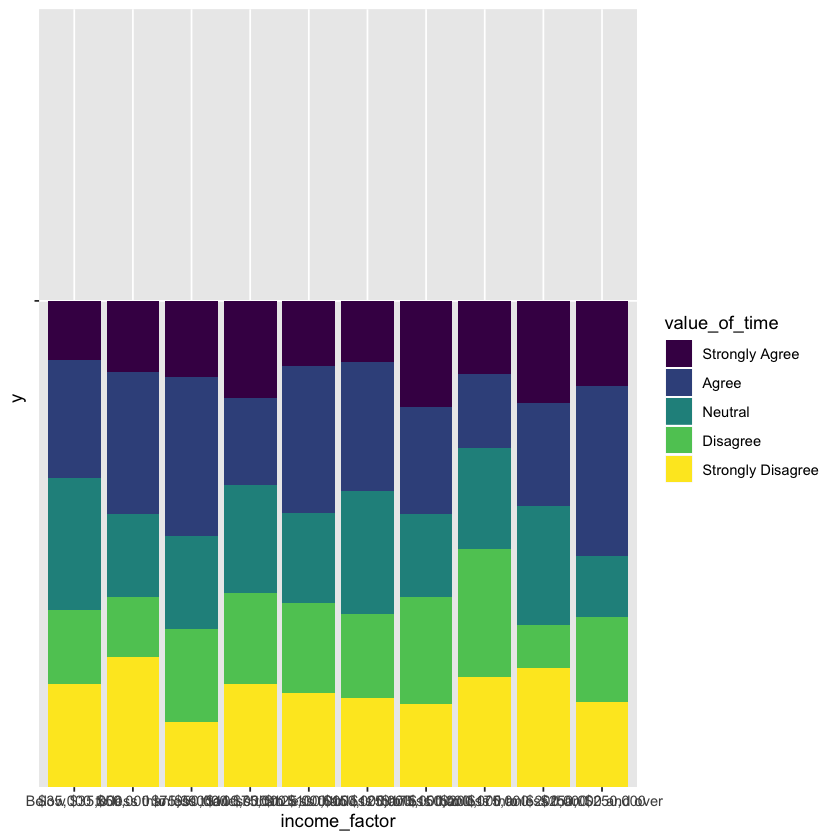

In [7]:
# calculates question regarding value of time by income
vot_income <- visualization %>%
    select(income_factor, value_of_time)

vot_income <- na.omit(vot_income)

ggplot(vot_income) + 
    geom_bar(aes(x = income_factor, fill = value_of_time, y = ""), stat = "identity", position = "fill") +
    scale_fill_viridis_d()

## Reliability
-------------

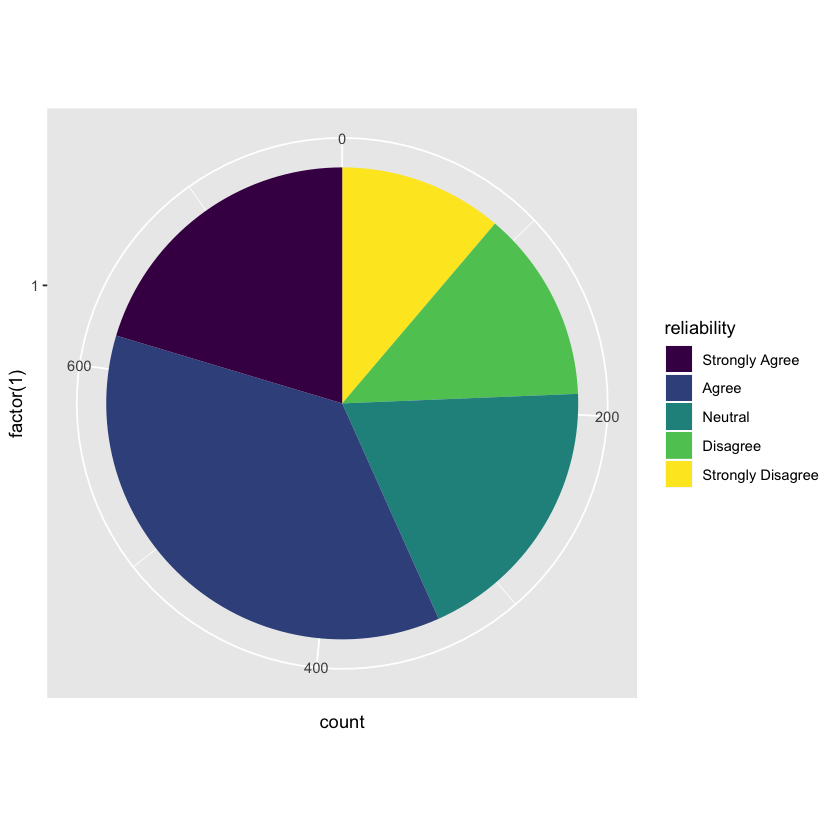

In [8]:
# makes pie chart of reliability
vor <- visualization %>%
    select(reliability)

vor <- na.omit(vor)

ggplot(vor, aes(x = factor(1), fill = reliability)) +
    geom_bar() + 
    coord_polar("y") +
    scale_fill_viridis_d()

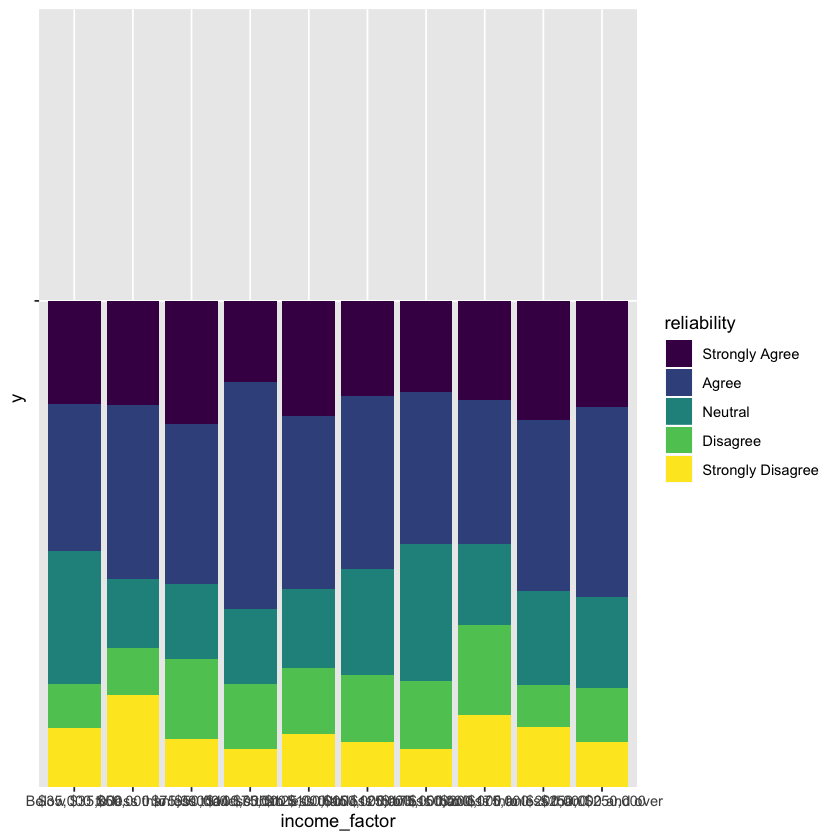

In [9]:
# stacked bar chart of reliability of HOT lanes by income group
vor_income <- visualization %>%
    select(income_factor, reliability)

vor_income <- na.omit(vor_income)

ggplot(vor_income) + 
    geom_bar(aes(x = income_factor, fill = reliability, y = ""), stat = "identity", position = "fill")  +
    scale_fill_viridis_d()

## Penalty Analysis
------

### The more weekdays a person travels I405, the less likely they are to support higher penalties for violators -- unless they drive it five days a week. 
### Income does not seem to affect how people view violators, unless you are in the highest income brackets, where they more strongly agree.

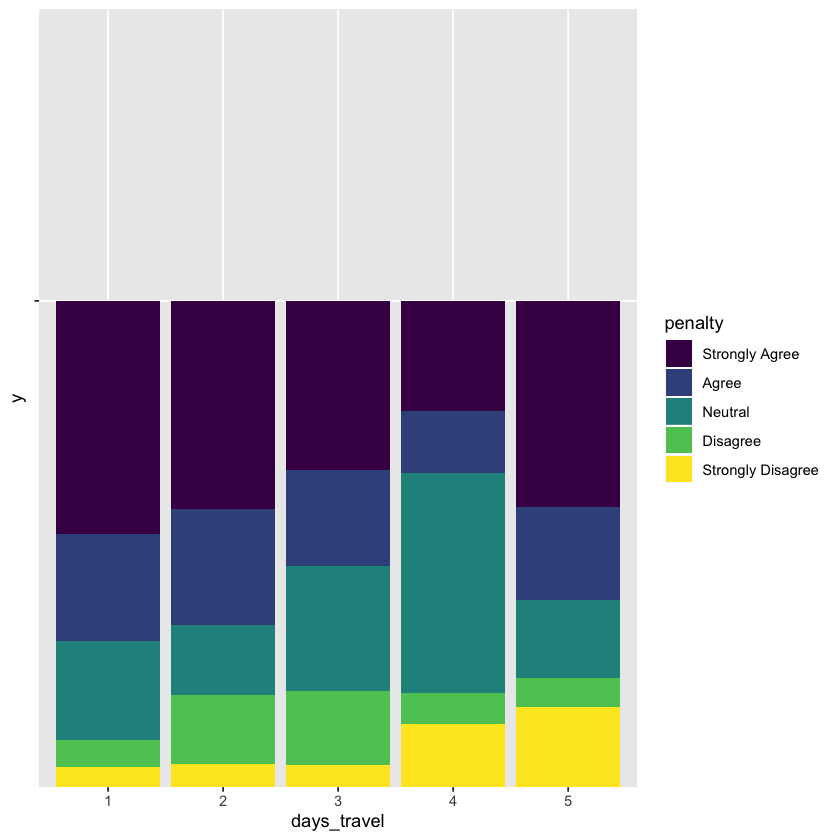

In [10]:
# analyzes how people view whether violators should be punished by days traveled in weekday
penalty_data <- visualization %>%
    select(penalty, days_travel)

penalty_data <- na.omit(penalty_data)

ggplot(penalty_data) + 
    geom_bar(aes(x = days_travel, fill = penalty, y = ""), stat = "identity", position = "fill") +
    scale_fill_viridis_d()

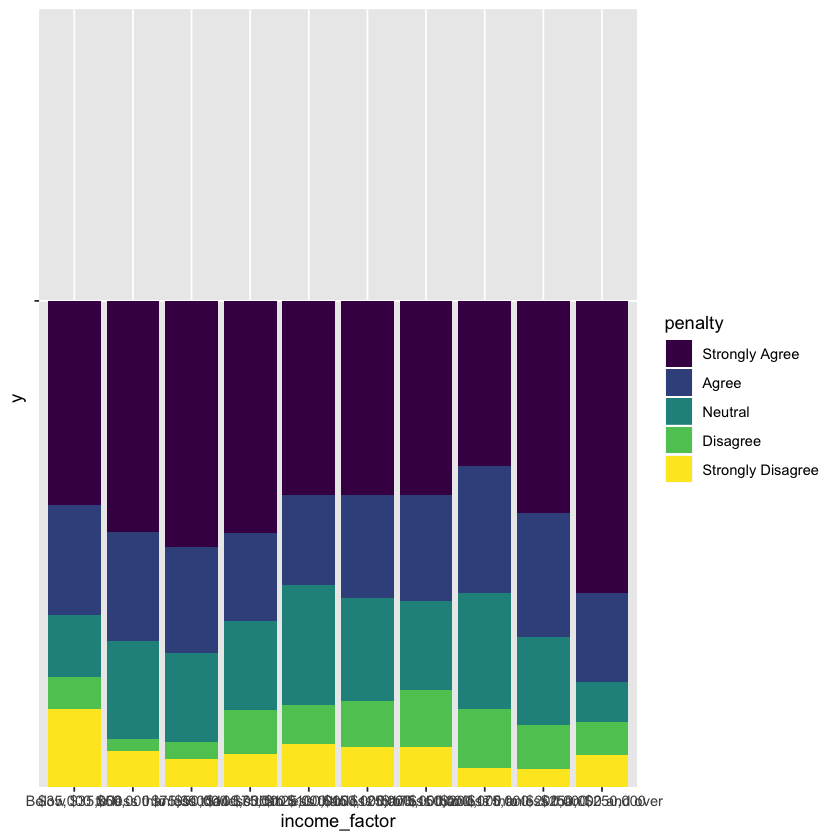

In [11]:
# analyzes how people view the punishment of violators by income
penalty_data <- visualization %>%
    select(penalty, income_factor)

penalty_data <- na.omit(penalty_data)

ggplot(penalty_data) + 
    geom_bar(aes(x = income_factor, fill = penalty, y = ""), stat = "identity", position = "fill") +
    scale_fill_viridis_d()

## HOT use 
----------

### Overall, HOT use and payment is not determined by how much users value the time or reliability of the HOT lanes

#### Income Analysis

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


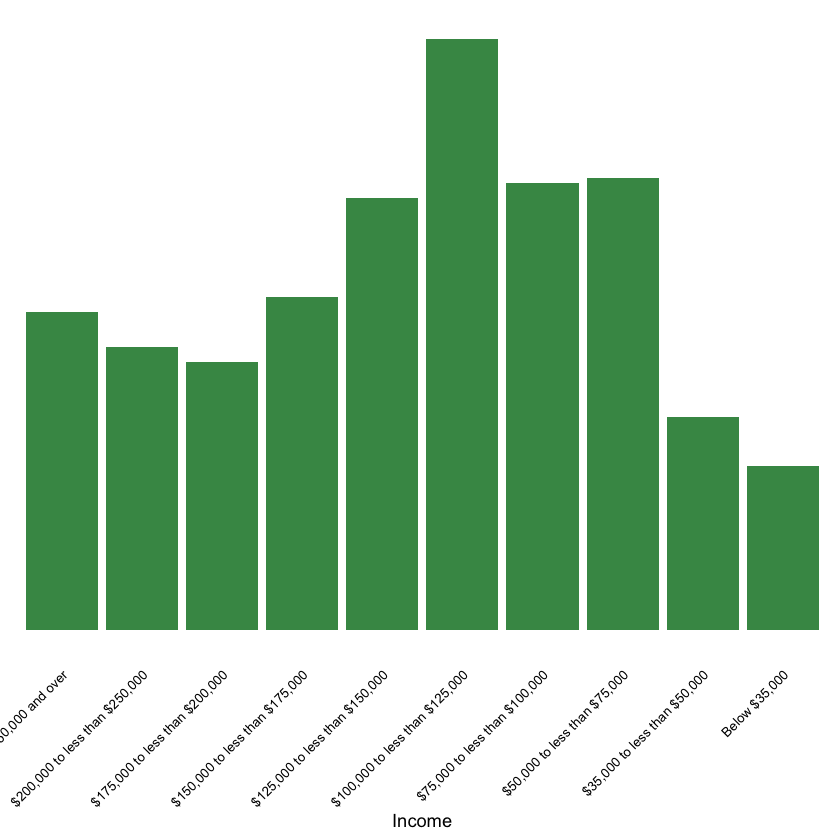

In [12]:
hot_use <- visualization %>%
    select(income_factor)

hot_use <- na.omit(hot_use)

ggplot(hot_use) + 
    geom_bar(aes(x = income_factor), stat = "count", fill = "#449555") +
    theme(axis.title.y=element_blank(),
      axis.ticks=element_blank(),
         legend.title = element_blank(),
          axis.text.y = element_blank(),
          axis.text.x = element_text(color = "black", angle = 45, size = 8, hjust = 1),
         strip.text = element_text(size = 15),
         panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), panel.background = element_blank()
         ) +
    xlab("Income") +
    scale_fill_viridis_d() +
    scale_x_discrete() +
    scale_x_discrete(limits = rev(levels(hot_use$income_factor)))



ggsave(filename = "../../../images/incomesurvey.png", width = 10, height = 6)

#### Use by Income

income_factor,use
<fct>,<fct>
"$250,000 and over",equal
"$175,000 to less than $200,000",never
"$150,000 to less than $175,000",mostly
"$50,000 to less than $75,000",equal
"$250,000 and over",mostly
"$200,000 to less than $250,000",rarely


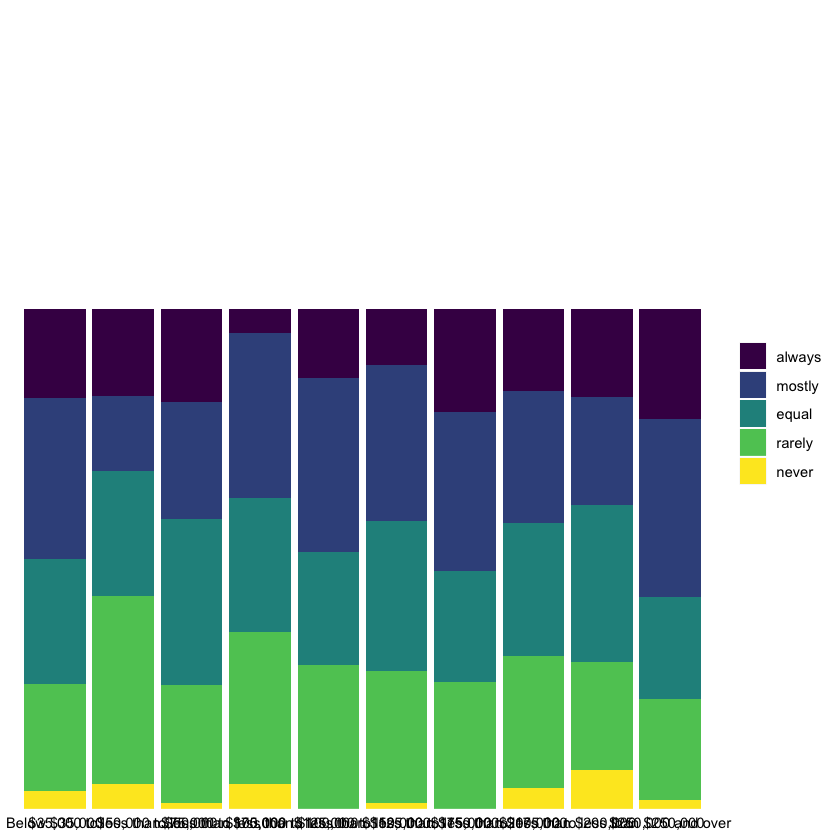

In [13]:
# how often users use HOT lanes, with or without toll, by income
hot_use <- visualization %>%
    select(income_factor, use)

hot_use <- na.omit(hot_use)

head(hot_use)
ggplot(hot_use) + 
    geom_bar(aes(x = income_factor, fill = use, y = ""), stat = "identity", position = "fill") +
    theme(axis.title=element_blank(),
      axis.ticks=element_blank(),
         legend.title = element_blank(),
          axis.text.y = element_blank(),
          axis.text.x = element_text(color = "black"),
         strip.text = element_text(size = 15),
         panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), panel.background = element_blank()
         ) +
    scale_fill_viridis_d()

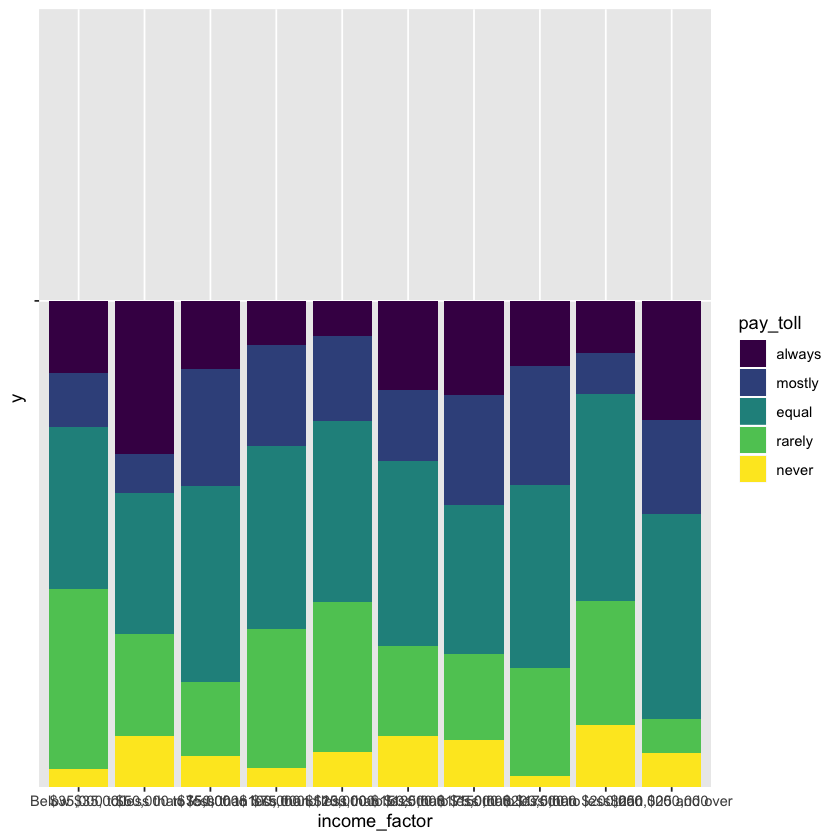

In [14]:
# how often users pay toll by income
hot_use <- visualization %>%
    select(income_factor, pay_toll)

hot_use <- na.omit(hot_use)

ggplot(hot_use) + 
    geom_bar(aes(x = income_factor, fill = pay_toll, y = ""), stat = "identity", position = "fill") +
    scale_fill_viridis_d()

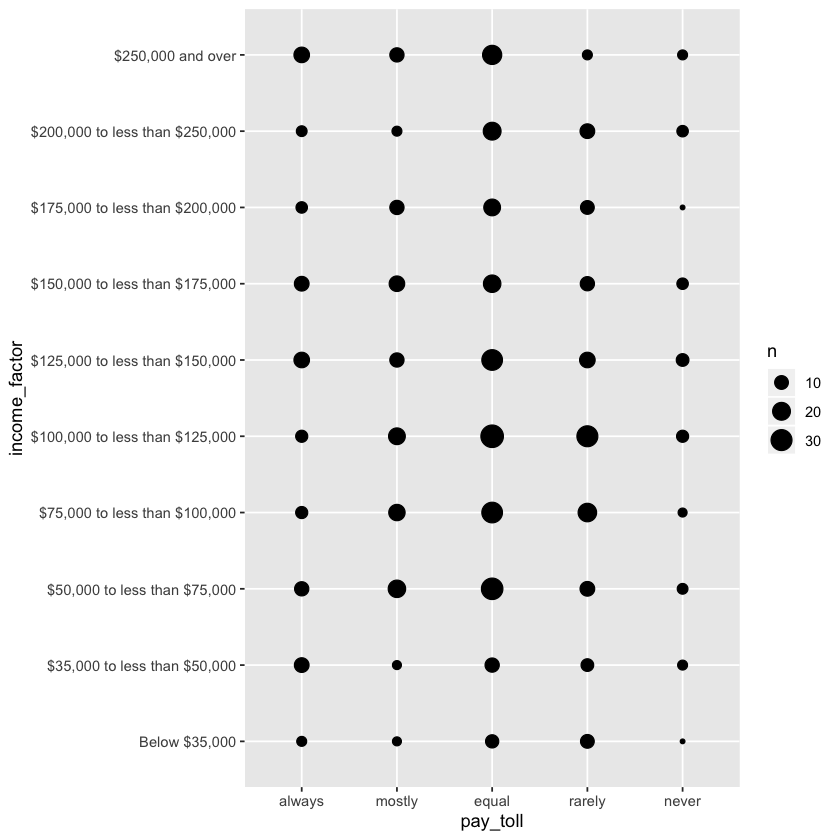

In [15]:
# analyzes counts of those that intersect the categories of income groups and paying the toll
ggplot(hot_use, aes(x = pay_toll, y = income_factor)) +
    geom_count()

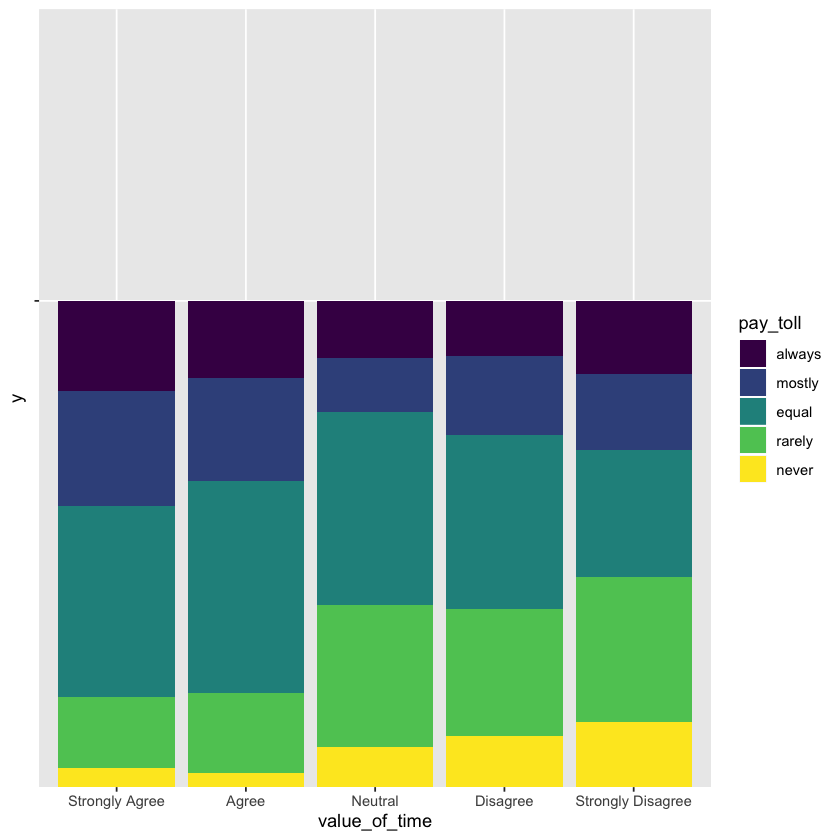

In [16]:
# how often users pay toll by how much they think HOT is a good value of time
hot_use <- visualization %>%
    select(pay_toll, value_of_time)

hot_use <- na.omit(hot_use)

ggplot(hot_use) + 
    geom_bar(aes(x = value_of_time, fill = pay_toll, y = ""), stat = "identity", position = "fill") +
    scale_fill_viridis_d()

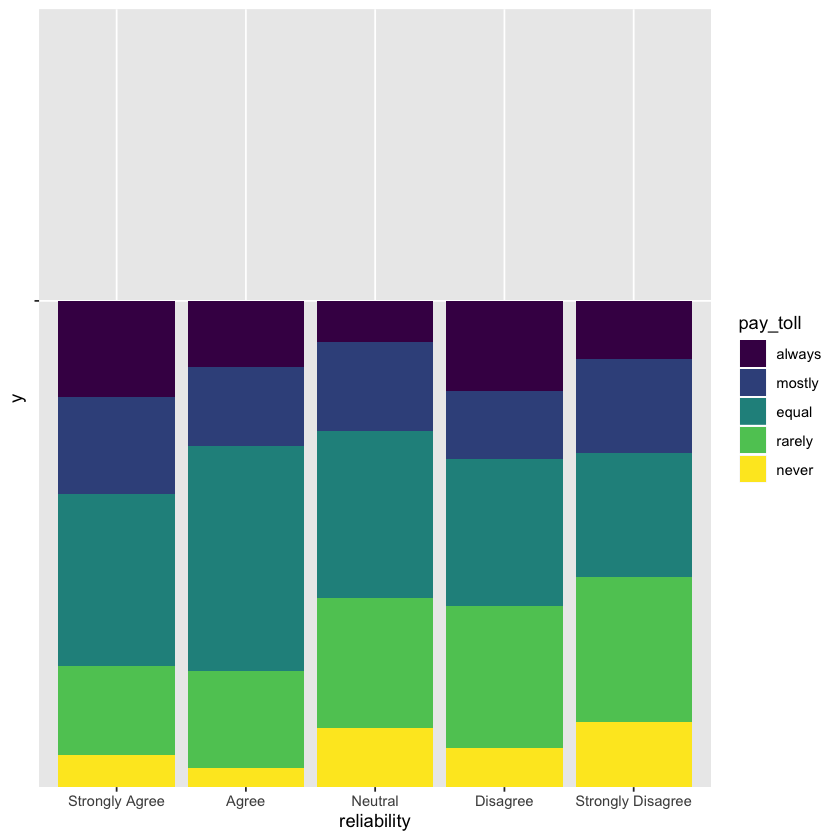

In [17]:
# how often users pay toll by how much they think HOT is reliable
hot_use <- visualization %>%
    select(pay_toll, reliability)

hot_use <- na.omit(hot_use)

ggplot(hot_use) + 
    geom_bar(aes(x = reliability, fill = pay_toll, y = ""), stat = "identity", position = "fill") +
    scale_fill_viridis_d()

## Historic User Analysis
-----

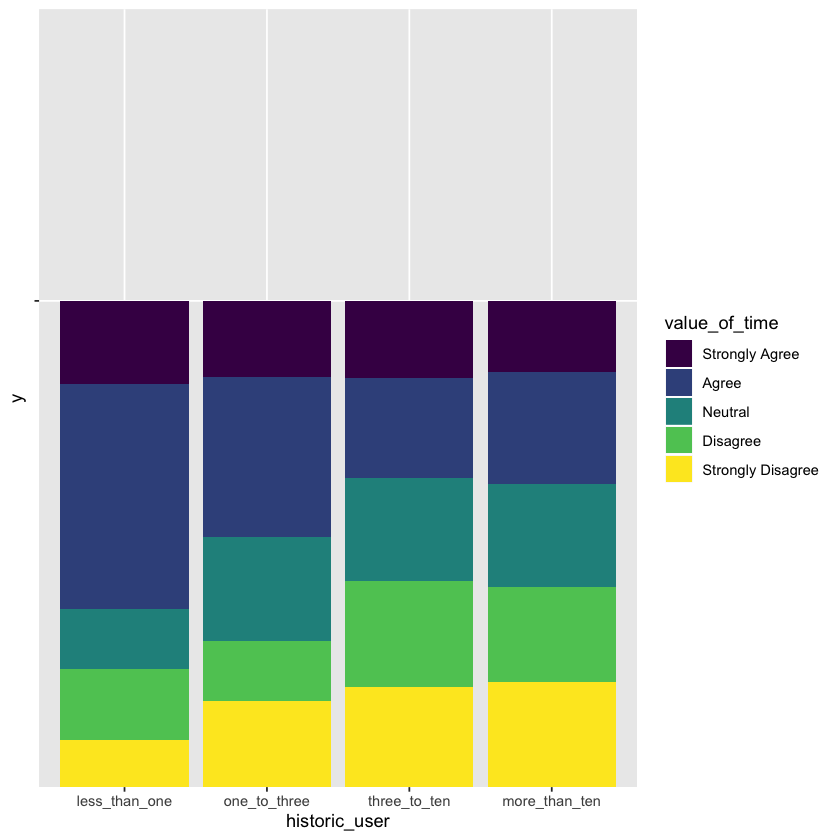

In [18]:
# analyzes how the amount of time spent driving on 405 affects how users value HOT times
historic_user_data <- visualization %>%
    select(historic_user, value_of_time)

historic_user_data <- na.omit(historic_user_data)

ggplot(historic_user_data) + 
    geom_bar(aes(x = historic_user, fill = value_of_time, y = ""), stat = "identity", position = "fill")  +
    scale_fill_viridis_d()

## Commuter Analysis

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

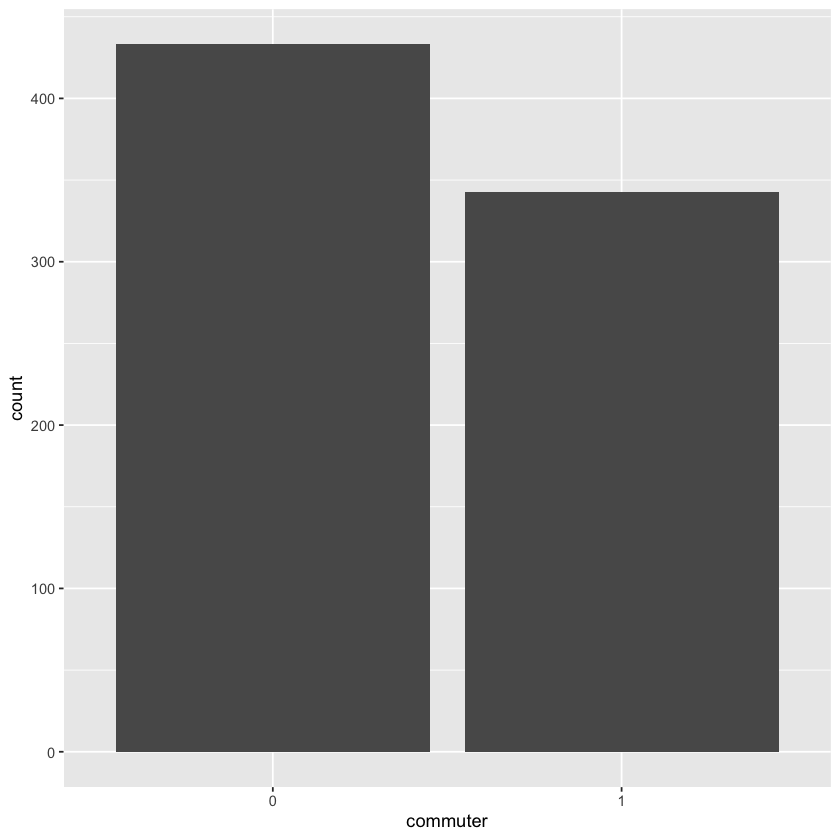

In [19]:
visualization %>%
    filter(status == "Complete" | !is.na(income_factor)) %>%
ggplot(aes(x = commuter)) +
    geom_histogram(stat = "count") + 
    scale_fill_viridis_d()